In [1]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def test_case(array: list[int], path_to_testing_file: str) -> dict:
    """Runs given script with time util and returns dict with measured parameters"""
    
    args = ['/usr/bin/time', '-l', '-p', path_to_testing_file]
    child_proccess = subprocess.Popen(
        args, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    child_process_output = child_proccess.communicate(
        "\n".join(map(str, [len(array), *array])).encode()
    )
    
    time_data = [i.strip() for i in str(child_process_output[1]).split('\\n')]
    if time_data[0] == "b'time: command terminated abnormally":
        i = 1
    else:
        i = 0
    statistic_data = {
        'real_time': float(time_data[i+0].split()[1].replace(',', '.')),
        'user_time': float(time_data[i+1].split()[1].replace(',', '.')),
        'sys_time': float(time_data[i+2].split()[1].replace(',', '.')),
        'maximum_resident_set_size': int(time_data[i+3].split()[0]),
        'page_reclaims': int(time_data[i+7].split()[0]),
        'voluntary_context_switches': int(time_data[i+15].split()[0]),
        'involuntary_context_switches': int(time_data[i+16].split()[0]),
        'instructions_retired': int(time_data[i+17].split()[0]),
        'cycles_elapsed': int(time_data[i+18].split()[0]),
        'peak_memory_footprint': int(time_data[i+19].split()[0]),
    }
    
    return statistic_data

In [3]:
print(test_case(np.random.randint(-10000,10000,10000), './counting_sort'))

{'real_time': 0.01, 'user_time': 0.0, 'sys_time': 0.0, 'maximum_resident_set_size': 925696, 'page_reclaims': 350, 'voluntary_context_switches': 2, 'involuntary_context_switches': 12, 'instructions_retired': 23078737, 'cycles_elapsed': 12900881, 'peak_memory_footprint': 507904}


In [4]:
print(test_case(np.random.randint(-10000,10000,10000), './quicksort'))

{'real_time': 0.01, 'user_time': 0.0, 'sys_time': 0.0, 'maximum_resident_set_size': 823296, 'page_reclaims': 321, 'voluntary_context_switches': 1, 'involuntary_context_switches': 9, 'instructions_retired': 38368982, 'cycles_elapsed': 20439850, 'peak_memory_footprint': 405504}


In [7]:
data = pd.DataFrame(columns=[
    'array_size', 
    'counting_sort_real_time',
    'counting_sort_user_time',
    'counting_sort_sys_time',
    'counting_sort_maximum_resident_set_size',
    'counting_sort_page_reclaims',
    'counting_sort_voluntary_context_switches',
    'counting_sort_involuntary_context_switches',
    'counting_sort_instructions_retired',
    'counting_sort_cycles_elapsed',
    'counting_sort_peak_memory_footprint',
    'quicksort_real_time',
    'quicksort_user_time',
    'quicksort_sys_time',
    'quicksort_maximum_resident_set_size',
    'quicksort_page_reclaims',
    'quicksort_voluntary_context_switches',
    'quicksort_involuntary_context_switches',
    'quicksort_instructions_retired',
    'quicksort_cycles_elapsed',
    'quicksort_peak_memory_footprint'
])

In [8]:
i = 0
for size in tqdm(range(10000, 10000000, 100000)):
    counting_out = test_case(np.random.randint(-10000, 10000, size), './counting_sort')
    quicksort_out = test_case(np.random.randint(-10000,10000, size), './quicksort')
    data.loc[i] = [size, *list(counting_out.values()), *list(quicksort_out.values())]
    i += 1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [20:57<00:00, 12.58s/it]


In [9]:
data

,array_size,counting_sort_real_time,counting_sort_user_time,counting_sort_sys_time,counting_sort_maximum_resident_set_size,counting_sort_page_reclaims,counting_sort_voluntary_context_switches,counting_sort_involuntary_context_switches,counting_sort_instructions_retired,counting_sort_cycles_elapsed,...,quicksort_real_time,quicksort_user_time,quicksort_sys_time,quicksort_maximum_resident_set_size,quicksort_page_reclaims,quicksort_voluntary_context_switches,quicksort_involuntary_context_switches,quicksort_instructions_retired,quicksort_cycles_elapsed,quicksort_peak_memory_footprint
0,10000.0,0.01,0.00,0.00,884736.0,337.0,2.0,16.0,2.312232e+07,1.325963e+07,...,0.01,0.00,0.00,823296.0,328.0,1.0,38.0,3.874863e+07,2.488335e+07,405504.0
1,110000.0,0.10,0.03,0.00,1748992.0,548.0,2.0,51.0,3.401238e+08,1.413820e+08,...,0.11,0.05,0.00,1216512.0,417.0,2.0,7.0,4.164991e+08,1.934998e+08,798720.0
2,210000.0,0.15,0.04,0.00,1687552.0,533.0,1.0,10.0,4.187693e+08,1.766064e+08,...,0.20,0.10,0.00,1617920.0,515.0,1.0,8.0,8.134476e+08,3.746942e+08,1200128.0
3,310000.0,0.23,0.06,0.00,2084864.0,630.0,3.0,42.0,6.169202e+08,2.597513e+08,...,0.31,0.15,0.00,2023424.0,614.0,2.0,11.0,1.237334e+09,5.673591e+08,1605632.0
4,410000.0,0.30,0.09,0.00,2506752.0,733.0,1.0,25.0,8.146742e+08,3.409848e+08,...,0.41,0.20,0.00,2416640.0,710.0,2.0,31.0,1.668762e+09,7.656238e+08,1998848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9510000.0,7.01,2.11,0.02,38899712.0,9618.0,1.0,545.0,1.882451e+10,7.813830e+09,...,19.82,14.92,0.03,38830080.0,9600.0,1.0,2069.0,1.279520e+11,5.580224e+10,38412288.0
96,9610000.0,7.08,2.11,0.02,39280640.0,9711.0,2.0,292.0,1.888619e+10,7.820981e+09,...,20.24,15.21,0.04,39235584.0,9699.0,1.0,3297.0,1.304065e+11,5.687499e+10,38817792.0
97,9710000.0,7.28,2.15,0.02,39694336.0,9812.0,1.0,420.0,1.921972e+10,7.949412e+09,...,20.65,15.47,0.04,39628800.0,9795.0,2.0,3915.0,1.322793e+11,5.775779e+10,39211008.0
98,9810000.0,7.20,2.14,0.02,40087552.0,9908.0,1.0,884.0,1.928250e+10,7.969249e+09,...,20.82,15.69,0.04,40038400.0,9895.0,1.0,3006.0,1.345577e+11,5.880592e+10,39620608.0


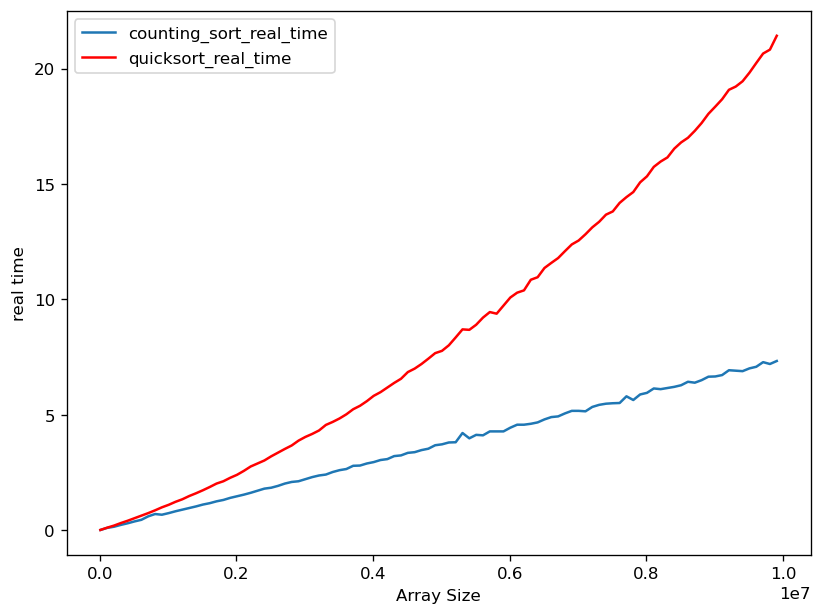

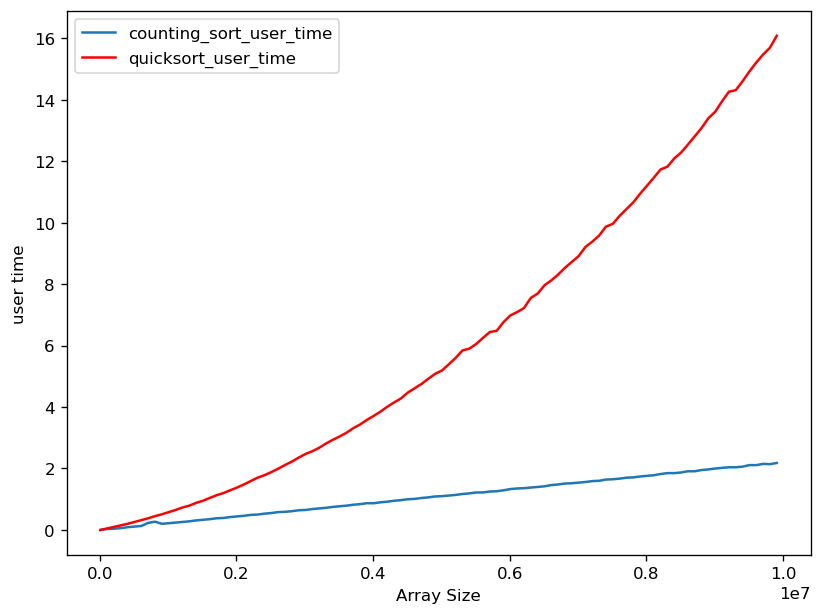

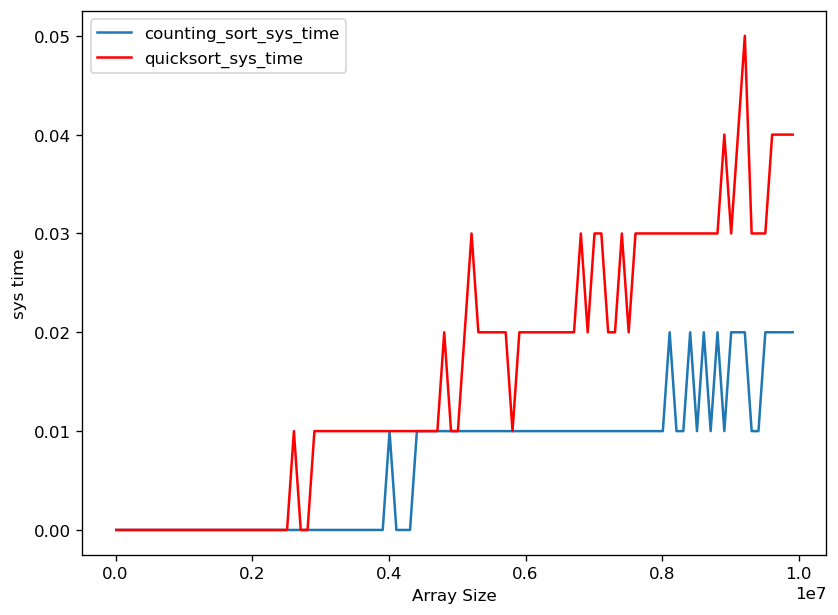

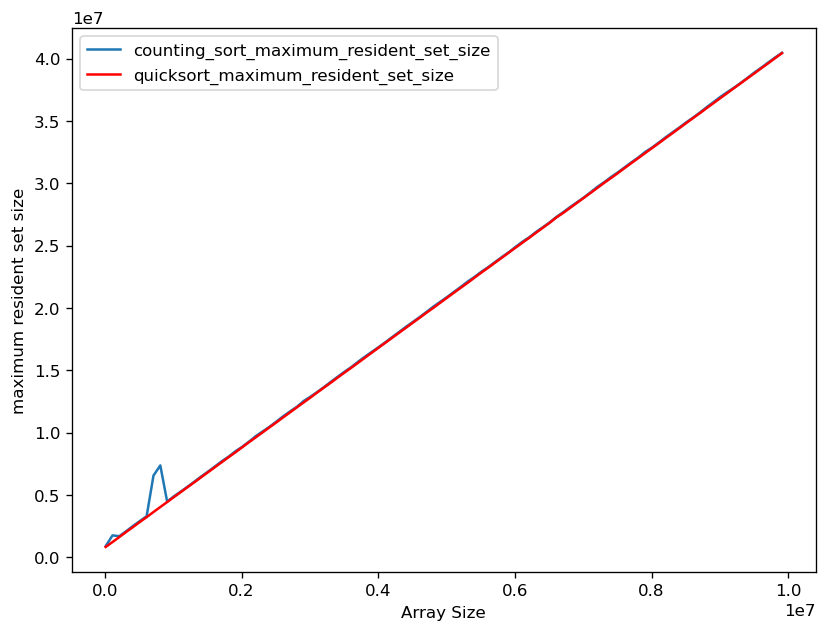

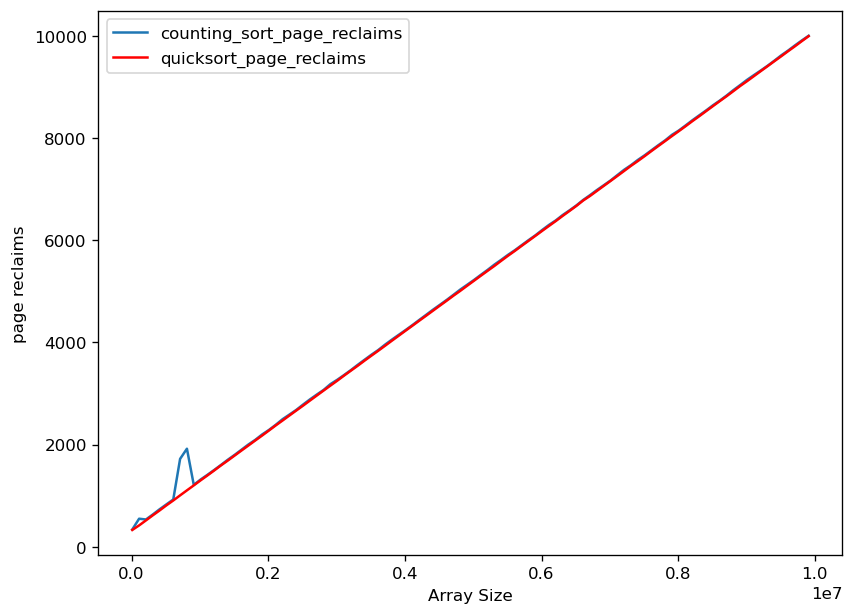

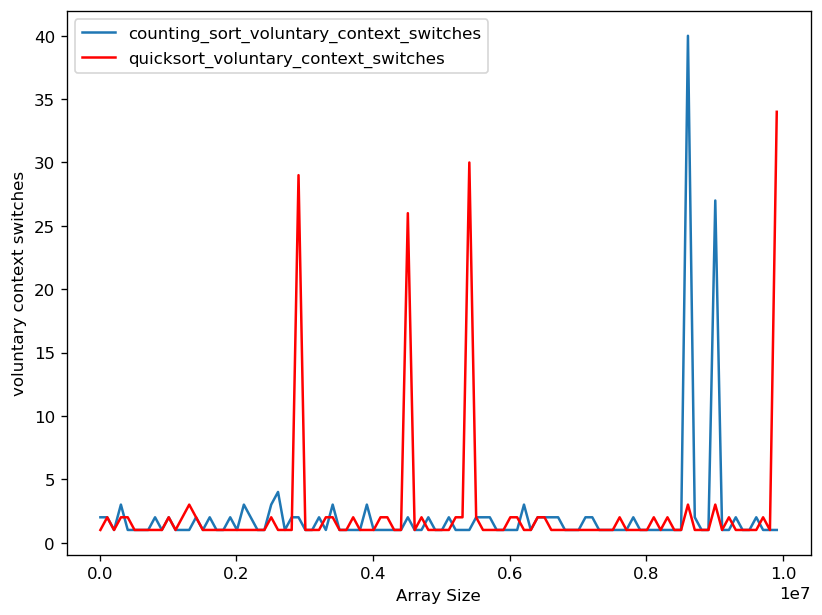

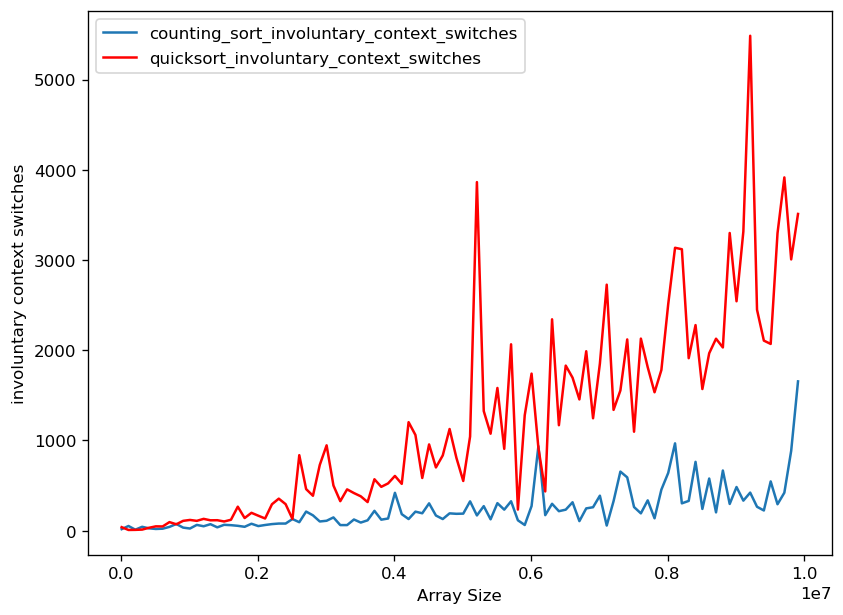

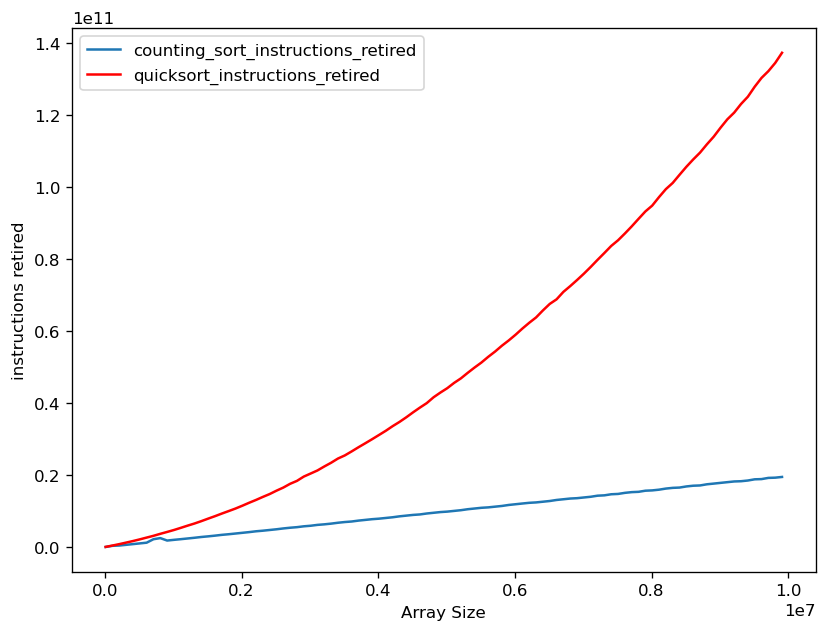

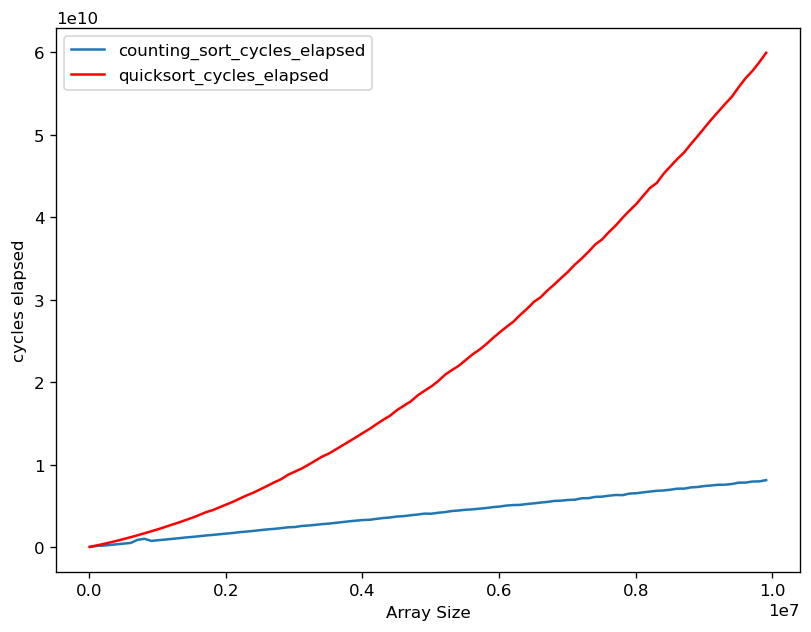

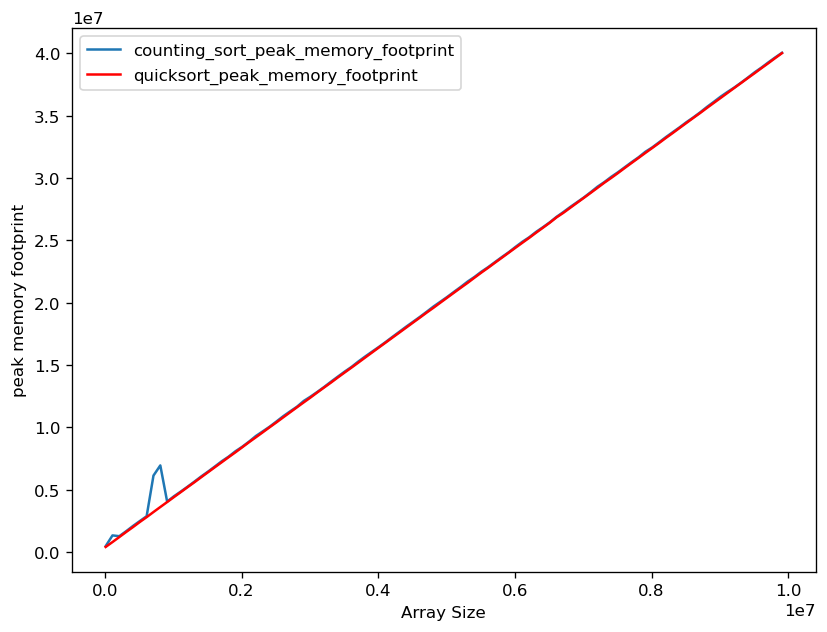

In [10]:
%matplotlib inline

def draw_graph(feature: str):
    plt.figure(figsize=(8, 6), dpi=120)
    ax = plt.gca()
    data.plot(kind='line',x='array_size',y='counting_sort_' + feature,ax=ax)
    data.plot(kind='line',x='array_size',y='quicksort_' + feature, color='red', ax=ax)
    plt.xlabel('Array Size')
    plt.ylabel(" ".join(feature.split('_')))
    plt.show()

draw_graph('real_time')
draw_graph('user_time')
draw_graph('sys_time')
draw_graph('maximum_resident_set_size')
draw_graph('page_reclaims')
draw_graph('voluntary_context_switches')
draw_graph('involuntary_context_switches')
draw_graph('instructions_retired')
draw_graph('cycles_elapsed')
draw_graph('peak_memory_footprint')